# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Name: Please input your name

## UNI: Please input your UNI

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


## Question 1: Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.1: Load the provided dataset**

In [2]:
df = pd.read_csv("tb_lobby_stats_player.csv.zip")
df.head()

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

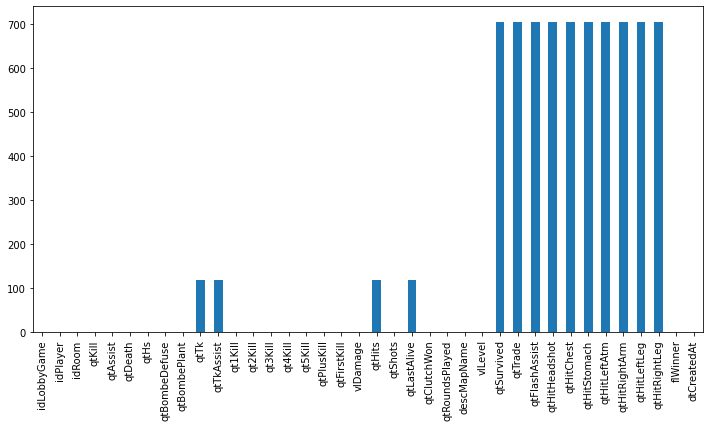

In [3]:
plt.figure(figsize = (12, 6))
df.isna().sum().plot.bar();

In [4]:
df = df.drop(["idLobbyGame", "idPlayer", "idRoom", "dtCreatedAt"], axis = 1)

We will be dropping first three id columns.

Also we will be imputing the missing values with the mean values

In [5]:
cols = ["qtTk", "qtTkAssist", "qtHits", "qtLastAlive", "qtSurvived", "qtTrade", "qtFlashAssist", "qtHitHeadshot", \
        "qtHitChest", "qtHitStomach", "qtHitLeftAtm", "qtHitRightArm", "qtHitLeftLeg", "qtHitRightLeg"]
for i in cols:
  df[i] = df[i].fillna(df[i].mean())

df.head()

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,...,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner
0,5,1,16,2,0,0,0.0,0.0,3,1,...,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0
1,24,3,18,6,0,4,0.0,1.0,9,4,...,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1
2,6,4,23,2,0,1,0.0,1.0,4,1,...,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0
3,10,5,20,4,1,0,0.0,0.0,6,2,...,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1
4,8,4,26,6,0,2,0.0,0.0,4,2,...,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0


**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

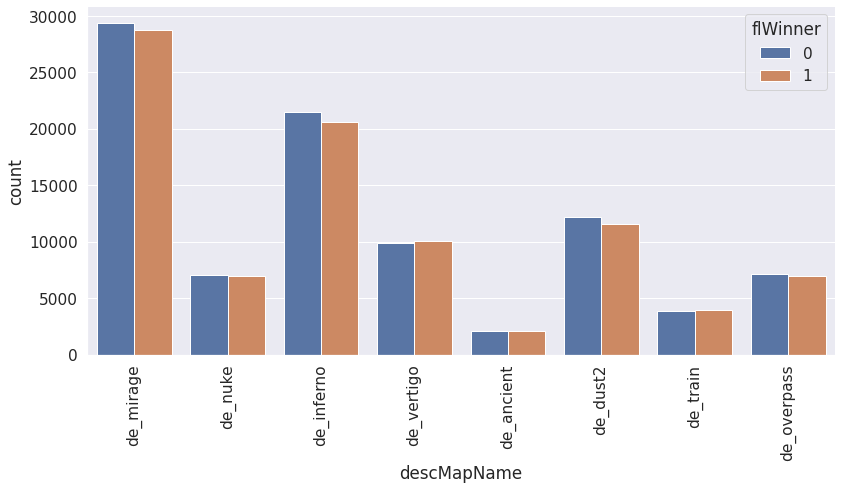

In [6]:
c = ["descMapName"]
sns.set(font_scale = 1.4)
for i, col_name in enumerate(c):
    sns.catplot(x = col_name, hue = 'flWinner', kind = 'count', data = df, height = 6, aspect = 2, legend_out = False)
    plt.xticks(rotation = 90)
plt.show()

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["flWinner"])
y = df['flWinner']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [8]:
from sklearn.preprocessing import OneHotEncoder

one_enc = OneHotEncoder(handle_unknown='ignore')

one_hot_map_dev = one_enc.fit_transform(X_dev[['descMapName']])
one_hot_map_dev_df = pd.DataFrame(one_hot_map_dev.toarray(), columns = one_enc.get_feature_names_out())
X_dev_preprocessed = X_dev.join(one_hot_map_dev_df)
X_dev_preprocessed.drop(['descMapName'], axis = 1, inplace = True)
X_dev_preprocessed.fillna(0, inplace = True)

one_hot_map_test = one_enc.transform(X_test[['descMapName']])
one_hot_map_test_df = pd.DataFrame(one_hot_map_test.toarray(), columns = one_enc.get_feature_names_out())
X_test_preprocessed = X_test.join(one_hot_map_test_df)
X_test_preprocessed.drop(['descMapName'], axis = 1, inplace = True)
X_test_preprocessed.fillna(0, inplace = True)


No scaling is necessary as we are using trees which are invariant to scale of the input data.

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

***** Development Set Analysis *****
Accuracy on Dev Set  : 1.0000
Precision :  1.0
Recall :  1.0
F1 Score :  1.0


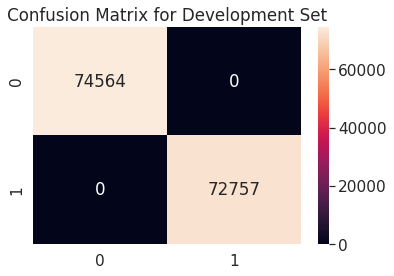

***** Test Set Analysis *****
Accuracy on Test Set : 0.7297
Precision :  0.7296362693321577
Recall :  0.7296272009337518
F1 Score :  0.729631371372726


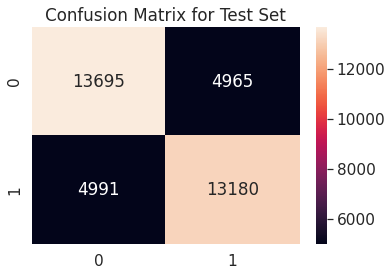

In [9]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

clf = tree.DecisionTreeClassifier()
clf.fit(X_dev_preprocessed, y_dev)

y_pred_dev = clf.predict(X_dev_preprocessed)
y_pred_test = clf.predict(X_test_preprocessed)

dev_acc = sum(np.where(y_pred_dev == y_dev, 1, 0))/y_dev.shape[0]
test_acc = sum(np.where(y_pred_test == y_test, 1, 0))/y_test.shape[0]

print("***** Development Set Analysis *****")
print("Accuracy on Dev Set  : {:0.4f}".format(dev_acc))
prfs = precision_recall_fscore_support(y_dev, y_pred_dev, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])
cf = confusion_matrix(y_dev, y_pred_dev)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Development Set")
plt.show()

print("***** Test Set Analysis *****")
print("Accuracy on Test Set : {:0.4f}".format(test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_test, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])
cf = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Test Set")
plt.show()

**1.7: Visualize the trained tree until the max_depth 8**

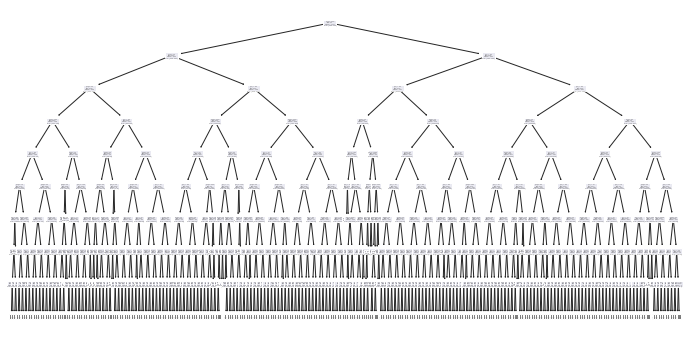

In [10]:
plt.figure(figsize = (12, 6))
tree.plot_tree(clf, max_depth = 8);

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [11]:
path = clf.cost_complexity_pruning_path(X_dev_preprocessed, y_dev)
alphas = path['ccp_alphas']

len(alphas)

9536

In [12]:
path = clf.cost_complexity_pruning_path(X_dev_preprocessed, y_dev)
alphas = path['ccp_alphas']

alphas = alphas[9000:9010]

best_clf = None
best_acc_score = 0.0
best_alpha = None
for i in alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha = i, random_state = 42)
    clf.fit(X_dev_preprocessed, y_dev)
    
    y_pred = clf.predict(X_test_preprocessed)
    test_acc = sum(np.where(y_pred == y_test, 1, 0))/y_test.shape[0]
    
    if test_acc > best_acc_score:
        best_acc_score = test_acc
        best_clf = clf
        best_alpha = i

print("Best Test Set Accuracy at alpha {} : {:0.4f}".format(best_alpha, best_acc_score))
print("At this alpha, the max depth is    : {}".format(best_clf.tree_.max_depth))

Best Test Set Accuracy at alpha 2.7076986971510605e-05 : 0.7814
At this alpha, the max depth is    : 24


In [13]:
best_clf_y_pred = best_clf.predict(X_test_preprocessed)
prfs = precision_recall_fscore_support(y_test, best_clf_y_pred, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Precision :  0.7820097235453274
Recall :  0.7810956108112623
F1 Score :  0.7811525910173059


**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

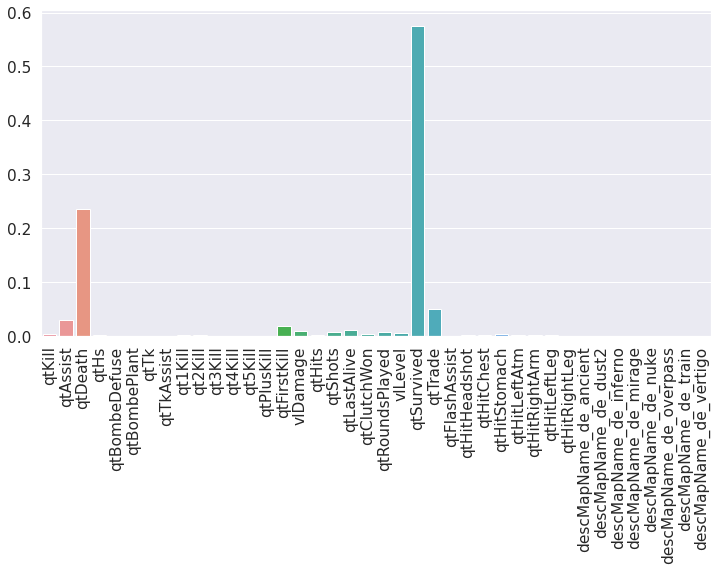

In [14]:
features = X_dev_preprocessed.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = best_clf.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [15]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

rfc = RandomForestClassifier()
rfc.fit(X_dev_preprocessed, y_dev)

y_pred_test_rfc = clf.predict(X_test_preprocessed)
test_acc_rfc = sum(np.where(y_pred_test_rfc == y_test, 1, 0))/y_test.shape[0]

print("Accuracy on Test Set : {:0.4f}".format(test_acc_rfc))
prfs = precision_recall_fscore_support(y_test, y_pred_test_rfc, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Accuracy on Test Set : 0.7813
Precision :  0.7818635067445383
Recall :  0.7809623554793237
F1 Score :  0.781019642319351


Random Forest performs better on Decision Tree

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [16]:
def bfs(clf):
    '''Implementing Breadth First Search to find the Impurities in the Leaf Nodes'''
    q = [0]
    l_c = clf.tree_.children_left
    r_c = clf.tree_.children_right
    imp = clf.tree_.impurity
    imp_leaf = []
    while q:
        temp = q.pop(0)
        # If left child and right child are same it means that it is a leaf node.
        if l_c[temp] == r_c[temp]:
            impurity = imp[temp]
            imp_leaf.append(impurity)
        else:
            q.append(l_c[temp])
            q.append(r_c[temp])
    return imp_leaf

trees = rfc.estimators_
for dec_tree in trees:
    leaf_node_impurity = bfs(dec_tree)
    assert all(leaf_node_impurity) == 0.0

Yes, all tree in random forest have pure leaves

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


'n_estimators' and 'ccp_alpha'

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

They can choose randomly or values between min and max range of current values

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [17]:
from sklearn.model_selection import GridSearchCV

nos_est = [50, 100, 200]
alpha = np.logspace(-6, -4, 3)

params = {'n_estimators' : nos_est,
         'ccp_alpha' : alpha}

rfc_tuned = GridSearchCV(RandomForestClassifier(), params, cv = 3, verbose = 5, scoring = 'accuracy')
rfc_tuned.fit(X_dev_preprocessed, y_dev)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ..ccp_alpha=1e-06, n_estimators=50;, score=0.786 total time=  13.9s
[CV 2/3] END ..ccp_alpha=1e-06, n_estimators=50;, score=0.784 total time=  13.7s
[CV 3/3] END ..ccp_alpha=1e-06, n_estimators=50;, score=0.785 total time=  13.9s
[CV 1/3] END .ccp_alpha=1e-06, n_estimators=100;, score=0.791 total time=  28.7s
[CV 2/3] END .ccp_alpha=1e-06, n_estimators=100;, score=0.787 total time=  27.8s
[CV 3/3] END .ccp_alpha=1e-06, n_estimators=100;, score=0.792 total time=  27.6s
[CV 1/3] END .ccp_alpha=1e-06, n_estimators=200;, score=0.793 total time=  55.2s
[CV 2/3] END .ccp_alpha=1e-06, n_estimators=200;, score=0.790 total time=  56.7s
[CV 3/3] END .ccp_alpha=1e-06, n_estimators=200;, score=0.793 total time=  56.8s
[CV 1/3] END ..ccp_alpha=1e-05, n_estimators=50;, score=0.788 total time=  24.2s
[CV 2/3] END ..ccp_alpha=1e-05, n_estimators=50;, score=0.786 total time=  24.1s
[CV 3/3] END ..ccp_alpha=1e-05, n_estimators=50;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': array([1.e-06, 1.e-05, 1.e-04]),
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=5)

In [18]:
print("Best Hyperparameters : ", rfc_tuned.best_params_)

print("--------------------------------------------------------------------------")

y_pred_rfc_tuned = rfc_tuned.predict(X_test_preprocessed)
rfc_tuned_test_acc = sum(np.where(y_pred_rfc_tuned == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(rfc_tuned_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_rfc_tuned, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Hyperparameters :  {'ccp_alpha': 1e-06, 'n_estimators': 200}
--------------------------------------------------------------------------
Best Test Set Accuracy on tuned model : 0.7912
Precision :  0.7919138017590852
Recall :  0.7908493552055756
F1 Score :  0.7909136823417451


**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

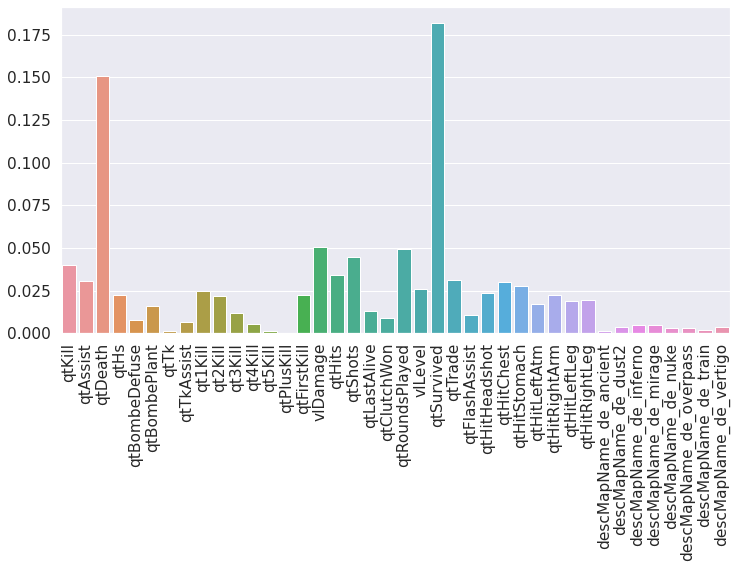

In [19]:
features = X_dev_preprocessed.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = rfc_tuned.best_estimator_.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

print("-----Gradient Boosting Classifier-----")

parameters = {"n_estimators": [50, 100],
            "max_depth": [5, 10],
            "learning_rate": [0.1, 1]}

GBC = GridSearchCV(GradientBoostingClassifier(), parameters, scoring = 'accuracy', verbose = 5, cv = 5)
GBC.fit(X_dev_preprocessed, y_dev)

-----Gradient Boosting Classifier-----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.796 total time=  35.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.796 total time=  34.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.797 total time=  34.8s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.799 total time=  33.7s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.798 total time=  33.8s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.800 total time= 1.1min
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.799 total time= 1.1min
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.799 total time= 1.1min
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.803 total time= 1.1min
[CV 5/5] END learning_rate=0.1, max_depth=5, n_esti

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=5)

In [21]:
print("Time for model selection : {} seconds".format(time.time() - start_time))
print("Best Hyperparameters : ", GBC.best_params_)

Time for model selection : 3197.3768985271454 seconds
Best Hyperparameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [22]:
y_pred_GBC = GBC.predict(X_test_preprocessed)
GBC_test_acc = sum(np.where(y_pred_GBC == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(GBC_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_GBC, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Test Set Accuracy on tuned model : 0.8003
Precision :  0.8008103056596707
Recall :  0.8000017208792286
F1 Score :  0.8000811265064478


In [23]:
start_time = time.time()

print("-----Hist Gradient Boosting Classifier-----")

parameters = {"max_depth": [5, 10],
            "learning_rate": [0.1, 1],
             'l2_regularization': np.logspace(-1, 2, 2)}

HGBC = GridSearchCV(HistGradientBoostingClassifier(), parameters, scoring = 'accuracy', verbose = 5, cv = 5)
HGBC.fit(X_dev_preprocessed, y_dev)

-----Hist Gradient Boosting Classifier-----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.800 total time=   4.6s
[CV 2/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.799 total time=   4.5s
[CV 3/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.798 total time=   4.5s
[CV 4/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.803 total time=   4.5s
[CV 5/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.801 total time=   4.5s
[CV 1/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=10;, score=0.802 total time=   5.2s
[CV 2/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=10;, score=0.801 total time=   5.3s
[CV 3/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=10;, score=0.801 total time=   5.2s
[CV 4/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=10;, score=0.804 total time=

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(),
             param_grid={'l2_regularization': array([  0.1, 100. ]),
                         'learning_rate': [0.1, 1], 'max_depth': [5, 10]},
             scoring='accuracy', verbose=5)

In [24]:
print("Time for model selection : {} seconds".format(time.time() - start_time))
print("Best Hyperparameters : ", HGBC.best_params_)

Time for model selection : 137.8541362285614 seconds
Best Hyperparameters :  {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 10}


In [25]:
y_pred_HGBC = HGBC.predict(X_test_preprocessed)
HGBC_test_acc = sum(np.where(y_pred_HGBC == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(HGBC_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_HGBC, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Test Set Accuracy on tuned model : 0.8015
Precision :  0.802088606475078
Recall :  0.801210393013425
F1 Score :  0.8012907388784103


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [26]:
from xgboost import XGBClassifier

start_time = time.time()

print("-----XGBoost Classifier-----")

parameters = {'max_depth': [5, 10],
             'eta': np.logspace(-2, 1, 2),
             'lambda': np.logspace(-3, 1, 2)}

XGB = GridSearchCV(XGBClassifier(eval_metric = 'logloss'), parameters, scoring = 'accuracy', verbose = 5, cv = 5)
XGB.fit(X_dev_preprocessed, y_dev)

-----XGBoost Classifier-----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END eta=0.01, lambda=0.001, max_depth=5;, score=0.800 total time=  24.1s
[CV 2/5] END eta=0.01, lambda=0.001, max_depth=5;, score=0.800 total time=  24.0s
[CV 3/5] END eta=0.01, lambda=0.001, max_depth=5;, score=0.799 total time=  24.0s
[CV 4/5] END eta=0.01, lambda=0.001, max_depth=5;, score=0.804 total time=  23.9s
[CV 5/5] END eta=0.01, lambda=0.001, max_depth=5;, score=0.801 total time=  23.9s
[CV 1/5] END eta=0.01, lambda=0.001, max_depth=10;, score=0.796 total time=  59.5s
[CV 2/5] END eta=0.01, lambda=0.001, max_depth=10;, score=0.798 total time= 1.0min
[CV 3/5] END eta=0.01, lambda=0.001, max_depth=10;, score=0.796 total time=  59.9s
[CV 4/5] END eta=0.01, lambda=0.001, max_depth=10;, score=0.800 total time= 1.0min
[CV 5/5] END eta=0.01, lambda=0.001, max_depth=10;, score=0.800 total time= 1.0min
[CV 1/5] END eta=0.01, lambda=10.0, max_depth=5;, score=0.800 total time=  24.0s
[CV 2

GridSearchCV(cv=5, estimator=XGBClassifier(eval_metric='logloss'),
             param_grid={'eta': array([ 0.01, 10.  ]),
                         'lambda': array([1.e-03, 1.e+01]),
                         'max_depth': [5, 10]},
             scoring='accuracy', verbose=5)

In [27]:
print("Time for model selection : {} seconds".format(time.time() - start_time))
print("Best Hyperparameters : ", XGB.best_params_)

Time for model selection : 1723.3009979724884 seconds
Best Hyperparameters :  {'eta': 0.01, 'lambda': 0.001, 'max_depth': 5}


In [28]:
y_pred_XGB = XGB.predict(X_test_preprocessed)
XGB_test_acc = sum(np.where(y_pred_XGB == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(XGB_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_XGB, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Test Set Accuracy on tuned model : 0.8001
Precision :  0.8006210940939826
Recall :  0.7998112695381726
F1 Score :  0.7998904935708091


**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

Comparision can be done using test accuracy or other metrics such as precision, recall or even AUC-ROC curve or AP curves

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

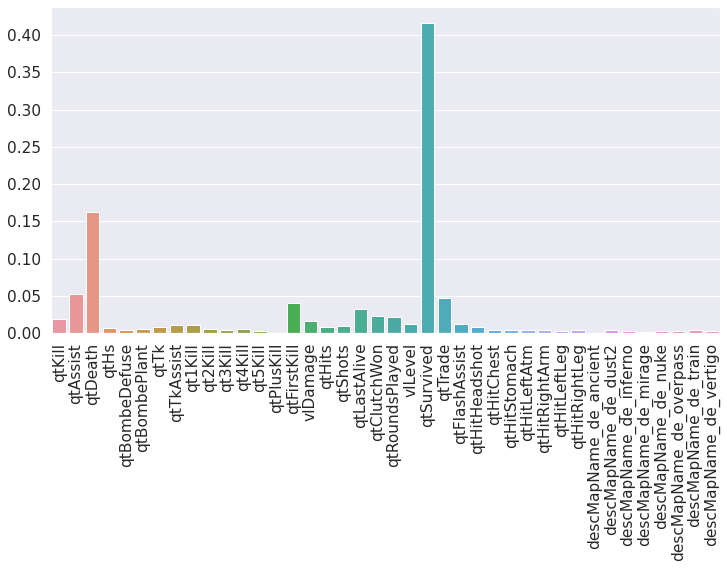

In [29]:
features = X_dev_preprocessed.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = XGB.best_estimator_.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [30]:
from collections import defaultdict

feature_imp = XGB.best_estimator_.feature_importances_

d = defaultdict(int)

for i, val in enumerate(feature_imp):
    d[i] = val
    
d = sorted(d.items(), key = lambda x: x[1], reverse = True)

top_7_features = [features[i[0]] for i in d][:7]
print("Top 7 features are : ", top_7_features)

Top 7 features are :  ['qtSurvived', 'qtDeath', 'qtAssist', 'qtTrade', 'qtFirstKill', 'qtLastAlive', 'qtClutchWon']


In [31]:
start_time = time.time()

print("-----XGBoost Classifier for Top 7 features-----")

parameters = {'max_depth': [5, 10],
             'eta': np.logspace(-3, -1, 2),
             'lambda': np.logspace(-2, 2, 2)}

XGB_tuned = GridSearchCV(XGBClassifier(eval_metric = "logloss"), parameters, scoring = 'accuracy', verbose = 5, cv = 5)
XGB_tuned.fit(X_dev_preprocessed[top_7_features], y_dev)

-----XGBoost Classifier for Top 7 features-----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.801 total time=   8.3s
[CV 2/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.797 total time=   8.4s
[CV 3/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.798 total time=   8.3s
[CV 4/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.801 total time=   8.2s
[CV 5/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.800 total time=   8.2s
[CV 1/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.797 total time=  17.5s
[CV 2/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.797 total time=  17.3s
[CV 3/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.797 total time=  17.1s
[CV 4/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.799 total time=  17.2s
[CV 5/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.797 total time=  17.4s
[CV 1/5] END eta=0.001, lambda=100.0, max_depth=5;, score=0.801 tot

GridSearchCV(cv=5, estimator=XGBClassifier(eval_metric='logloss'),
             param_grid={'eta': array([0.001, 0.1  ]),
                         'lambda': array([1.e-02, 1.e+02]),
                         'max_depth': [5, 10]},
             scoring='accuracy', verbose=5)

In [32]:
print("Time for model selection : {}".format(time.time() - start_time))
print("Best Hyperparameters : ", XGB_tuned.best_params_)

Time for model selection : 522.1862049102783
Best Hyperparameters :  {'eta': 0.001, 'lambda': 0.01, 'max_depth': 5}


In [33]:
y_pred_XGB_tuned = XGB_tuned.predict(X_test_preprocessed[top_7_features])
XGB_tuned_test_acc = sum(np.where(y_pred_XGB_tuned == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(XGB_tuned_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_XGB_tuned, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Test Set Accuracy on tuned model : 0.8003
Precision :  0.8011189468921267
Recall :  0.799963618224226
F1 Score :  0.8000377650831397


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [44]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

print(brier_score_loss(y_test, XGB.predict_proba(X_test_preprocessed)[:, 1]))

0.1297354566573331


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

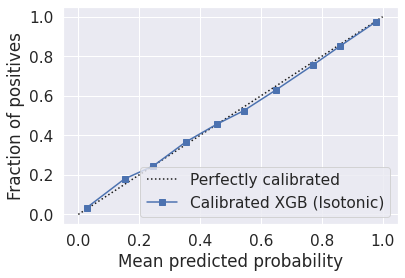

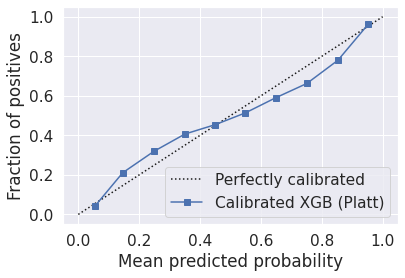

In [47]:
# Splitting data to get the calibration set
X_train, X_calib, y_train, y_calib = train_test_split(X_dev_preprocessed, y_dev, test_size = 0.25, random_state = 0)

# Isotonic Regression
cal_XGB_isotonic = CalibratedClassifierCV(XGB, cv = "prefit", method = "isotonic")
cal_XGB_isotonic.fit(X_calib, y_calib)
display_isotonic = CalibrationDisplay.from_estimator(cal_XGB_isotonic, X_test_preprocessed, y_test, n_bins = 10, name = 'Calibrated XGB (Isotonic)')

# Platt Scaling
cal_XGB_platt = CalibratedClassifierCV(XGB, cv = "prefit", method = "sigmoid")
cal_XGB_platt.fit(X_calib, y_calib)
display_platt = CalibrationDisplay.from_estimator(cal_XGB_platt, X_test_preprocessed, y_test, n_bins = 10, name = 'Calibrated XGB (Platt)')

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [48]:
print("Brier Score for Isotonic Regression : {:0.4f}".format(brier_score_loss(y_test, cal_XGB_isotonic.predict_proba(X_test_preprocessed)[:, 1])))
print("Brier Score for Platt Scaling       : {:0.4f}".format(brier_score_loss(y_test, cal_XGB_platt.predict_proba(X_test_preprocessed)[:, 1])))

Brier Score for Isotonic Regression : 0.1298
Brier Score for Platt Scaling       : 0.1321
